# Synopsis

# Configuration

In [174]:
source_dir = 'vierthaler-stylometry/fedpapers'
use_idf = True
# stop_words = None
stop_words = 'english'
max_features = 1000
n_components = 10

# Libraries

In [175]:
import glob

# For PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# For HCA
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

# For Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.colors

# Pragmas

In [176]:
%matplotlib inline

# Process

## Import the files into lists

In [177]:
files = glob.glob(source_dir+'/*.txt')
codes = [f.replace('.txt','').split('/')[-1].split('_') for f in files]
texts = [open(f, 'r', encoding='utf-8').read() for f in files]

## Use SKL to create TFIDF matrix

In [178]:
countVectorizer = TfidfVectorizer(max_features=max_features, use_idf=use_idf, stop_words=None)
countMatrix1 = countVectorizer.fit_transform(texts)

## Normalize matrix 

In [179]:
countMatrix = normalize(countMatrix1)
countMatrix = countMatrix.toarray()

## PCA

### Generate PCA

In [180]:
pca = PCA(n_components=n_components)
projected = pca.fit_transform(countMatrix)

### Plot PCA

In [181]:
authors = [code[1] for code in codes]
letters = list(set(authors))
author_ids = [letters.index(x) for x in authors]

In [182]:
def plot_pca(proj, pc_a=0, pc_b=1):
    plt.figure(figsize=(15,10))
    plt.scatter(proj[:, pc_a], 
                proj[:, pc_b],
                c=author_ids, 
                edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('Reds', 10))
    plt.xlabel('PC{}'.format(pc_a))
    plt.ylabel('PC{}'.format(pc_b))
    for i, x in enumerate(projected):
        plt.annotate(codes[i][1][:1], (x[pc_a], x[pc_b]))

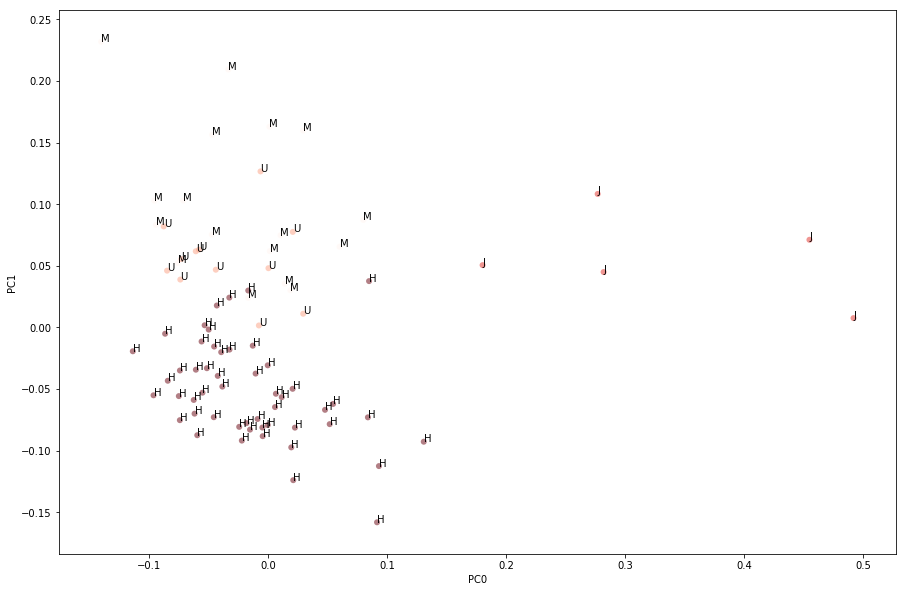

In [183]:
plot_pca(projected, 0, 1)

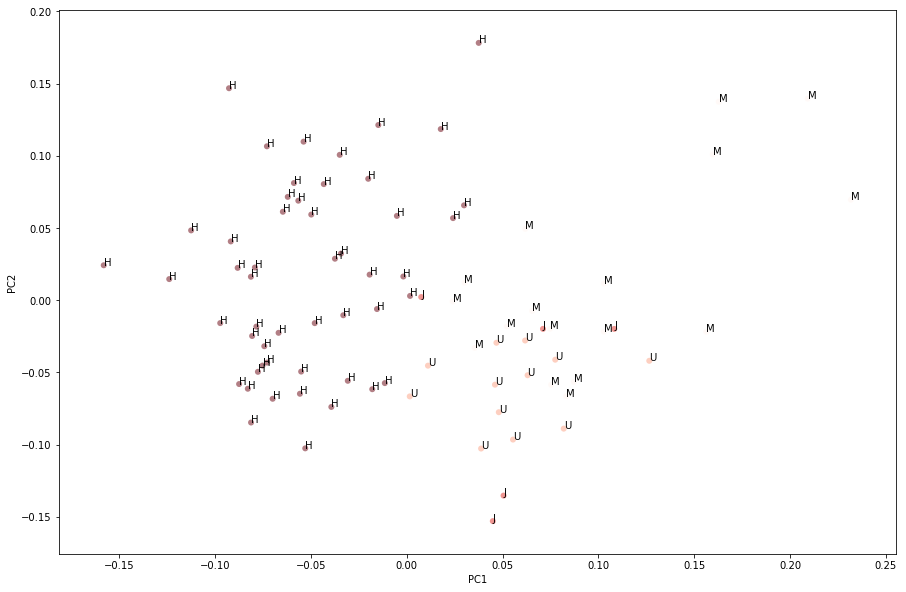

In [184]:
plot_pca(projected, 1, 2)

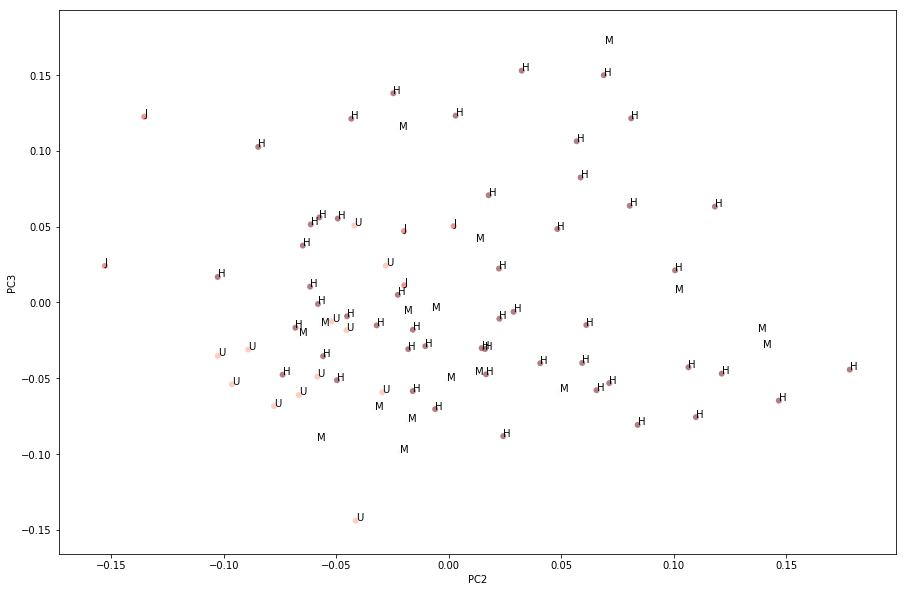

In [121]:
plot_pca(projected, 2, 3)

## HCA

### Generate similarity matrix

In [203]:
SIMS = pdist(countMatrix, metric='cosine')

### Generate HCA tree

In [204]:
TREE = sch.linkage(SIMS, method='ward')

### Plot tree

In the digrams, the length of the two legs of the U-link represents the distance between the child clusters.  It is also the
cophenetic distance between original observations in the two children clusters.

In [205]:
def plot_tree(tree, labels):
    plt.figure()
    fig, axes = plt.subplots(figsize=(10, 60))
    dendrogram = sch.dendrogram(tree, labels=labels, orientation="left", distance_sort=True)
    plt.tick_params(axis='both', which='major', labelsize=18)

<Figure size 432x288 with 0 Axes>

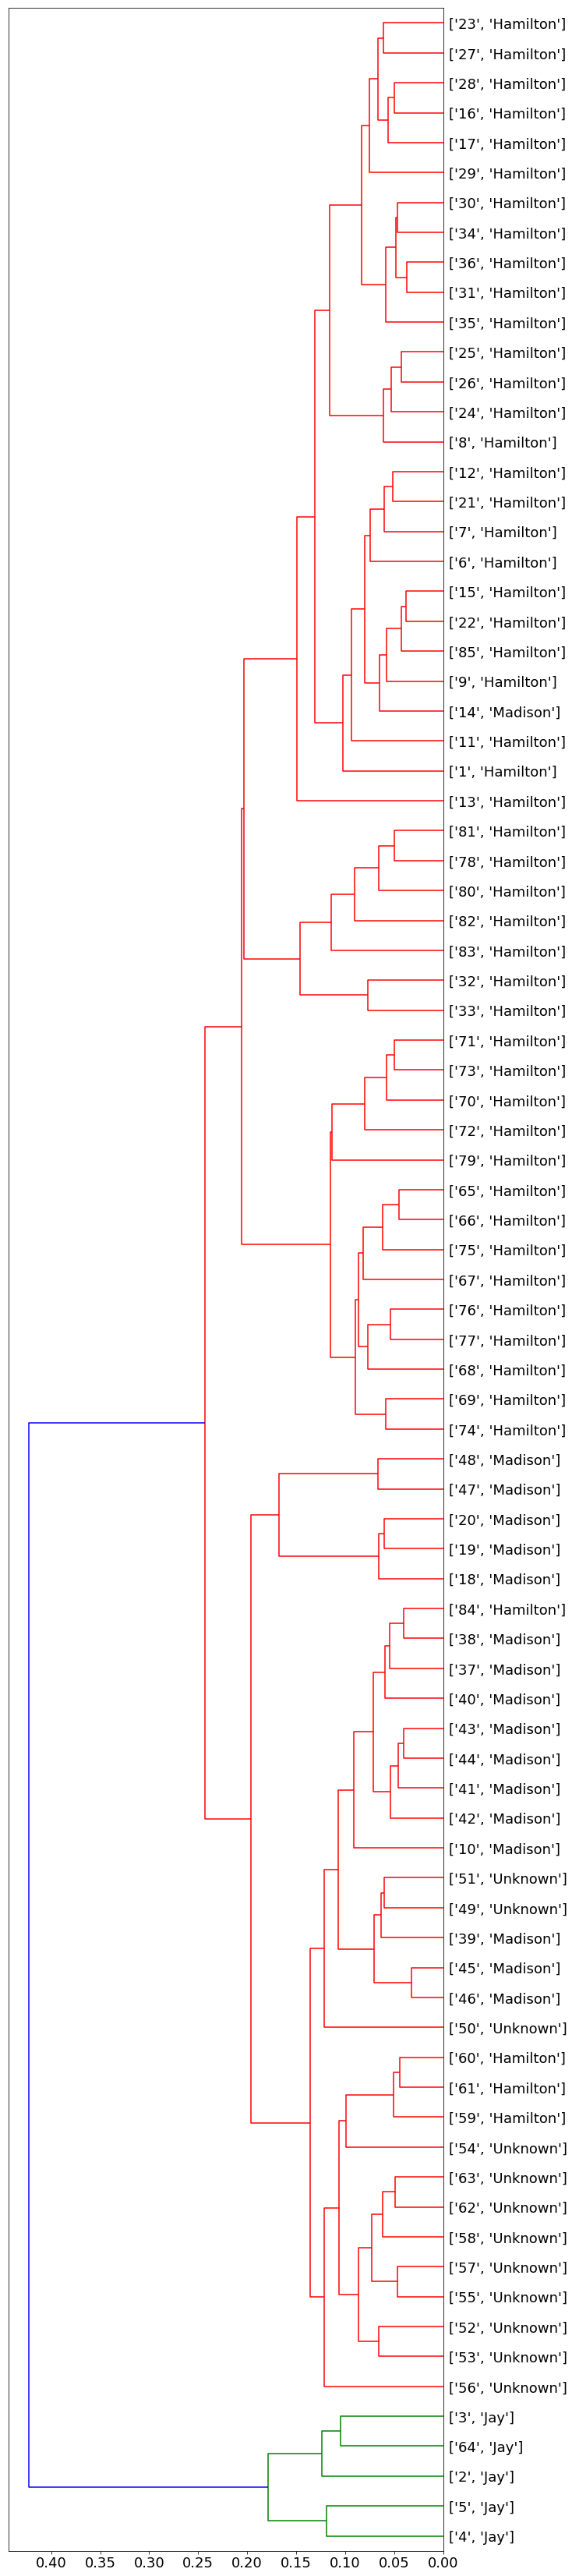

In [206]:
plot_tree(TREE, codes)

In [191]:
sch.dendrogram?

Signature:
sch.dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='b',
)
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children.  The top of the U-link indicates a
cluster merge.  The two legs of the U-link indicate which clusters
were merged.  The length of the two legs of the U-link represents
the distance between the child clusters.  It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix